### Data Profiling
#### To Learn: 
- Profile a data 
- Attribute variables to specific data types groups 
- Descriptive statistics 
- Use library to profile dataset

Dataset Craft Beers from CraftCans website is used. The dataset has only data from canned beers from breweries in US. It's not clear if the dataset reports every single canned beer brewed in US or not. Therefore, the sample dataset may contain biases.

##### Reference : https://www.datacamp.com/community/tutorials/python-data-profiling 

##### Notes: Always make sure the dataset format is in third normal form 
- Each variable forms a column and has values 
- Each observation forms a row
- Each type of observational unit forms a table 

### Structures of dataset

#### Beers
- ID : Unique identifier of beer
- Name 
- ABV : Alcohol volume
- IBU : International Bittering Units of the Beer 
- Style : Style of the beer
- Ounces : Ounces of beer

#### Breweries 
ID, Name, City, State

### STEP 1: Understand the Composition of Dataset

In [1]:
import pandas as pd 

beers = pd.read_csv("https://raw.githubusercontent.com/nickhould/craft-beers-dataset/master/data/processed/beers.csv")
breweries = pd.read_csv("https://raw.githubusercontent.com/nickhould/craft-beers-dataset/master/data/processed/breweries.csv")

In [2]:
print(beers)

      Unnamed: 0    abv    ibu    id  \
0              0  0.050    NaN  1436   
1              1  0.066    NaN  2265   
2              2  0.071    NaN  2264   
3              3  0.090    NaN  2263   
4              4  0.075    NaN  2262   
5              5  0.077    NaN  2261   
6              6  0.045    NaN  2260   
7              7  0.065    NaN  2259   
8              8  0.055    NaN  2258   
9              9  0.086    NaN  2131   
10            10  0.072    NaN  2099   
11            11  0.073    NaN  2098   
12            12  0.069    NaN  2097   
13            13  0.085    NaN  1980   
14            14  0.061   60.0  1979   
15            15  0.060    NaN  2318   
16            16  0.060    NaN  2170   
17            17  0.060    NaN  2169   
18            18  0.060    NaN  1502   
19            19  0.082    NaN  1593   
20            20  0.082    NaN  1592   
21            21  0.099   92.0  1036   
22            22  0.079   45.0  1024   
23            23  0.079    NaN   976   


In [3]:
print(breweries)

     Unnamed: 0                                 name           city state   id
0             0                   NorthGate Brewing     Minneapolis    MN    0
1             1            Against the Grain Brewery     Louisville    KY    1
2             2             Jack's Abby Craft Lagers     Framingham    MA    2
3             3            Mike Hess Brewing Company      San Diego    CA    3
4             4              Fort Point Beer Company  San Francisco    CA    4
5             5                COAST Brewing Company     Charleston    SC    5
6             6         Great Divide Brewing Company         Denver    CO    6
7             7                     Tapistry Brewing       Bridgman    MI    7
8             8                     Big Lake Brewing        Holland    MI    8
9             9           The Mitten Brewing Company   Grand Rapids    MI    9
10           10                       Brewery Vivant   Grand Rapids    MI   10
11           11                     Petoskey Brewing

In [4]:
# Join 2 tables 
beers_breweries = pd.merge(beers,breweries, how='inner', left_on="brewery_id",right_on = "id",sort=True, suffixes=('_beer','_brewery'))

In [5]:
beers.dtypes 

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [6]:
breweries.dtypes

Unnamed: 0     int64
name          object
city          object
state         object
id             int64
dtype: object

In [7]:
beers_breweries.dtypes

Unnamed: 0_beer         int64
abv                   float64
ibu                   float64
id_beer                 int64
name_beer              object
style                  object
brewery_id              int64
ounces                float64
Unnamed: 0_brewery      int64
name_brewery           object
city                   object
state                  object
id_brewery              int64
dtype: object

### To determine the category of each column in DataFrame 

In [8]:
def get_var_category(series): 
    unique_count = series.nunique(dropna= False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count == total_count:
        return 'Text(Unique)'
    else: 
        return 'Categorical'
    
def print_categories(df):
    for column_name in df.columns:
        print(column_name,": ", get_var_category(df[column_name]))

In [9]:
print_categories(beers)

Unnamed: 0 :  Numerical
abv :  Numerical
ibu :  Numerical
id :  Numerical
name :  Categorical
style :  Categorical
brewery_id :  Numerical
ounces :  Numerical


In [10]:
print_categories(breweries)

Unnamed: 0 :  Numerical
name :  Categorical
city :  Categorical
state :  Categorical
id :  Numerical


Categorical variables : Segment and group data 
Numerical variables : Extract diff measurements 

### STEP 2: Descriptive Statistics 

(Isolation measurements not helpful but combination of diff measurements could extract most value )

In [11]:
# Count the number of observations in Series with numerical variable

length = len(beers['ibu'])
print(length)

2410


In [12]:
# Return non-NA in the series 
count = beers['ibu'].count()
print(count)

1405


In [13]:
# Calculate number of missing values in Length and Count

number_of_missing_values = length - count 
pct_of_missing_values = float(number_of_missing_values/length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


In [14]:
# Ignoring missing values may incur bias result

# Get Minimum and Max value (Range)
print("Minimum value: ", beers['ibu'].min())
print("Maximum value: ", beers['ibu'].max())

# Get the mode 
print("Mode: " ,beers['ibu'].mode())

# Get the mean 
print("Mean: ", beers['ibu'].mean())

# Get the median 
print("Median: ", beers['ibu'].median())

# In skewed distribution, median is much better measure of central tendency than mean

# Get the standard deviation 
print("Standard Deviation: ", beers['ibu'].std())

# Get the quantiles 
print("Quantile: ", beers['ibu'].quantile([.25,.5,.75]))

Minimum value:  4.0
Maximum value:  138.0
Mode:  0    20.0
dtype: float64
Mean:  42.71316725978647
Median:  35.0
Standard Deviation:  25.954065911259324
Quantile:  0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64


In [15]:
# Or use describe()
beers['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [16]:
# Get measurement for all columns 
beers.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


### STEP3 : Distribution Plot 

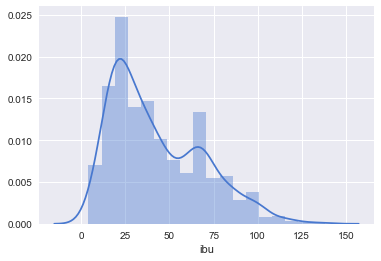

In [25]:
# Use seaborn library 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_palette(sns.color_palette("muted"))
sns.distplot(beers['ibu'].dropna()); #series without missing values 

plt.show()

### Correlation discover relationships between numerical variables

In [27]:
beers[["abv","ibu","ounces"]].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


### Dealing with non-numerical variables

In [28]:
# DataFrame has describe function to summarize dataset 
beers[["name","style"]].describe()

,name,style
count,2410,2405
unique,2305,99
top,Nonstop Hef Hop,American IPA
freq,12,424


### Profiling can be done if the dataset used is tidy and standardized

In [31]:
import pandas_profiling

pandas_profiling.ProfileReport(beers_breweries)

Number of variables,13
Number of observations,2410
Total Missing (%),3.4%
Total size in memory,263.6 KiB
Average record size in memory,112.0 B
Numeric,6
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,2
